In [1]:
import utils.data as data
import utils.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def eigenflow_vis(dataset, filename, time_unit_exp=1, flow_tuple=stats.five_tuple):
    # Load caida data
    df = data.load_data(dataset, filename, verbose=False)
    total_duration = df["time"].max() - df["time"].min()

    df = df[df["time"] < total_duration / 5]
    total_duration = total_duration / 5

    print("Truncated data to 1/20 of original size, total duration: {}".format(total_duration))

    # prepare for pca input
    print("flow_tuple: {}".format(flow_tuple))
    dfg = df.groupby(flow_tuple)
    gks = dfg.groups.keys()

    _, _, U, Sigma, VT, evar, evar_ratio = stats.flow_pca(dfg, gks, total_duration, time_unit_exp)


    # print the amount of variance explained by all the eigenflows
    print("explained variance: {}%".format(np.sum(evar_ratio)*100))

    print(evar_ratio.shape)
    print(U.shape)
    print(Sigma.shape)
    print(VT.shape)

    # plot eigenflow
    # fig, axes = plt.subplots(9, 2, figsize=(8, 10))

    # for i in range(9):
    #     axes[i, 0].plot(U[:, i])
    #     axes[i, 0].set_title("U{}, sigma={:.2e}".format(i, Sigma[i]))
    #     axes[i, 1].plot(VT[i, :])
    #     axes[i, 1].set_title("VT{}".format(i))
    #     # add padding between subplots
    #     fig.subplots_adjust(hspace=0.5)

    # plot explained variance against full variance
    fig, ax = plt.subplots()
    ax.plot(evar_ratio)
    


In [35]:
def flowsize_dist(dataset, filename, flow_tuple):
    df = data.load_data(dataset, filename, verbose=False)
    total_duration = df["time"].max()
    df = df[df["time"] < total_duration / 10]
    total_duration = total_duration / 10
    print("Truncated to first 1/10 duration: {:.3f}".format(total_duration))

    # dfg = df.groupby(stats.five_tuple)
    # srcip, srcport
    dfg = df.groupby(flow_tuple)

    flowsizes = dfg.size()

    max_raw_flow_header_index = np.argsort(list(flowsizes))[-1]
    max_raw_flow_header = list(dfg.groups.keys())[max_raw_flow_header_index]
    max_raw_flow = dfg.get_group(max_raw_flow_header)

    # print(max_raw_flow)

    # plt.hist(flowsizes, bins=10000, histtype="step")
    print("Grouped by {}, total number of flows: {}".format(
        flow_tuple,
        len(flowsizes)))
    for threshold in [2, 3, 5, 10, 50, 100]:
        num = np.sum(flowsizes < threshold)
        print("#flow w/ size < {}: {}, {:.2f}%".format(
            threshold, num, num/len(flowsizes)*100))
    
    if dataset in ["ugr16", "cidds", "ton"]:
        print("max flow has {} records, {} packets, lasts {:.3f} seconds".format(
            len(max_raw_flow), 
            np.sum(max_raw_flow["pkt"]),
            max_raw_flow["time"].max() - max_raw_flow["time"].min()))
    elif dataset in ["caida", "dc"]:
        print("max flow has {} packets, lasts {:.3f} seconds".format(
            len(max_raw_flow), 
            max_raw_flow["time"].max() - max_raw_flow["time"].min()))
    print()

Loading data from:
	data/caida/raw.csv
Number of packets: 998912
Trace duration: 2.3428690433502197 seconds
Truncated to first 1/10 duration: 0.234
Grouped by ['srcip', 'srcport', 'dstip', 'dstport', 'proto'], total number of flows: 20095
#flow w/ size < 2: 11235, 55.91%
#flow w/ size < 3: 14601, 72.66%
#flow w/ size < 5: 16932, 84.26%
#flow w/ size < 10: 18568, 92.40%
#flow w/ size < 50: 19854, 98.80%
#flow w/ size < 100: 20011, 99.58%
max flow has 1876 packets, lasts 0.183 seconds

Loading data from:
	data/caida/raw.csv
Number of packets: 998912
Trace duration: 2.3428690433502197 seconds
Truncated data to 1/20 of original size, total duration: 0.46857380867004395
flow_tuple: ['srcip', 'srcport', 'dstip', 'dstport', 'proto']
Time unit=1.00e-04 with 4685 time intervals and 32213 flows
(4685, 32213)
32213/32213
explained variance: 17.33476202634051%
(32213,)
(4685, 9)
(9,)
(9, 32213)


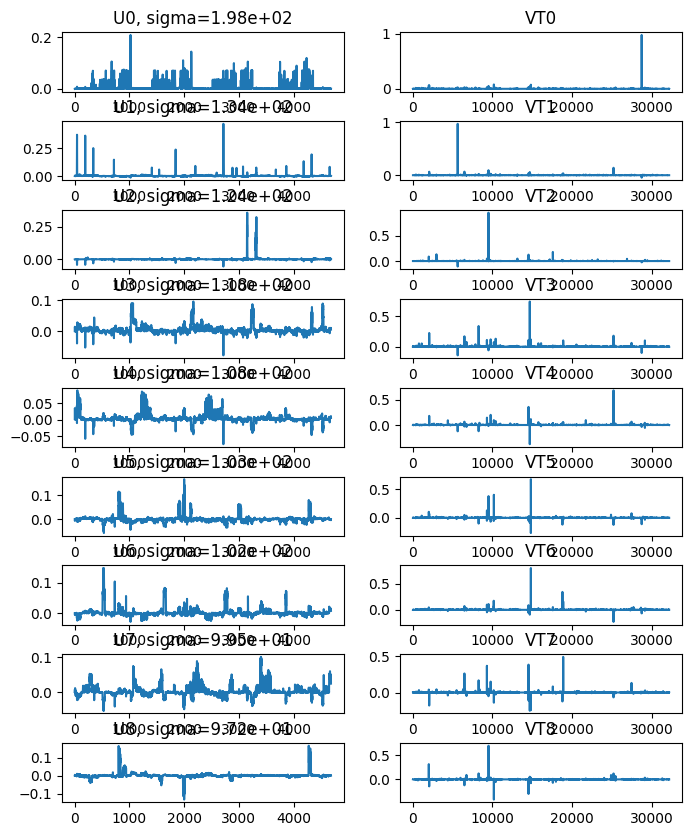

In [41]:
flow_tuple = [stats.five_tuple[i] for i in [0, 1, 2, 3, 4]]
flowsize_dist("caida", "raw.csv", flow_tuple)
eigenflow_vis("caida", "raw.csv", -4, flow_tuple)

Loading data from:
	data/ugr16/raw.csv
Number of packets: 1000000
Trace duration: 1342.636 seconds
Truncated to first 1/10 duration: 134.264
Grouped by ['srcip', 'dstip', 'proto'], total number of flows: 541
#flow w/ size < 2: 509, 94.09%
#flow w/ size < 3: 528, 97.60%
#flow w/ size < 5: 531, 98.15%
#flow w/ size < 10: 536, 99.08%
#flow w/ size < 50: 541, 100.00%
#flow w/ size < 100: 541, 100.00%
max flow has 18 records, 1100 packets, lasts 18.900 seconds

Loading data from:
	data/ugr16/raw.csv
Number of packets: 1000000
Trace duration: 1342.636 seconds
Truncated data to 1/20 of original size, total duration: 268.5272
flow_tuple: ['srcip', 'dstip', 'proto']
Time unit=1.00e-01 with 2685 time intervals and 1320 flows
(2685, 1320)
1320/1320
explained variance: 27.42829082489481%
(1320,)
(2685, 9)
(9,)
(9, 1320)


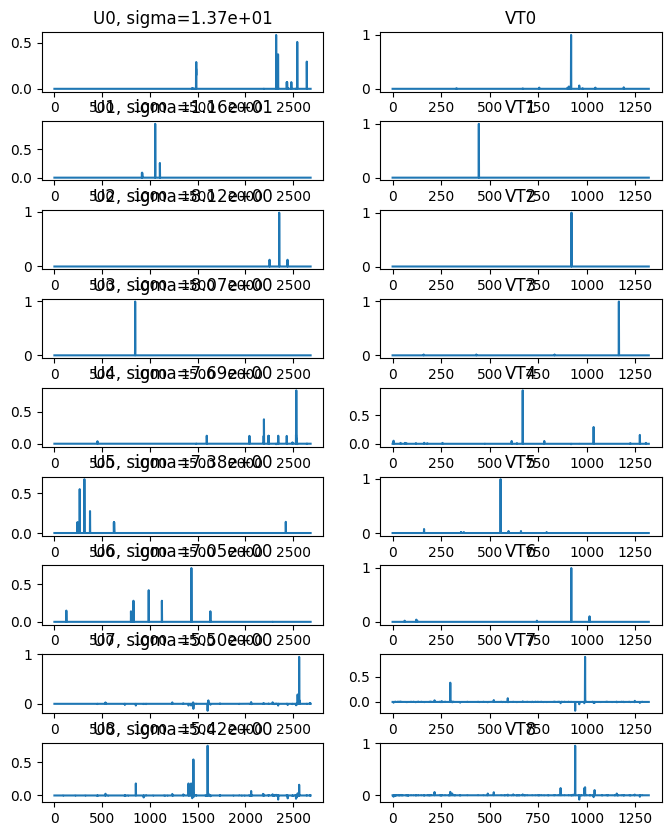

In [45]:
flow_tuple = [stats.five_tuple[i] for i in [0, 2, 4]]
flowsize_dist("ugr16", "raw.csv", flow_tuple)
eigenflow_vis("ugr16", "raw.csv", -1, flow_tuple)